# Capstone coursera Batalla de vecindarios

 Autor: Johan valerio 2021

## Tabla de contenidos
* [Introduccion: Problema de negocio](#introduction)
* [Datos](#data)
* [Metodologia](#methodology)
* [Analisis](#analysis)
* [Resultados y discusiones](#results)
* [Conclusiones](#conclusion)

# 1. Introduccion <a name="introduction"></a>

![bussines](https://peruconstruye.net/wp-content/uploads/2020/06/000630921W-1.jpg)

* La mayoria de personas cuando quieren inciar o emprender un negocio necesitan saber acerca de la segmentacion del mercado, hacia a quienes va dirigido y mucho mejor donde hacerlo.

* Ese es el objetivo de este proyecto de ciencia de datos,es  identificar los grupos y categorias mas prosperas en la cual iniciar un negocio en Lima Peru,
como tambien saber en que lugares dicha demanda por segmentacion es mas prospera.

# PROBLEMA COMERCIAL

* Un empresario necesita saber cuales son las zonas donde tendra la certeza de obtener mayores ventas en el departamento de Lima

* Por otro lado quisiera saber cuales son las categorias de negocios que existen en dicho lugar para poder divesificar distintos productos.

# 2. SECCION DE DATOS <a name="data"></a>

* Los datos de **provincias y distritos se obtienen de Wikipedia**, especificamente de una tabla con los distritos del Peru
* De dicha relacion solo se tendra en consideracion al departamento de lima.

* Las coordenadas de datos se obtienen con la libreria **geopy** de python

* Los lugares y establecimientos con sus respecticas categorias con la **API Foursquare**


In [38]:
import requests
import pandas as pd
url="https://es.wikipedia.org/wiki/Anexo:Distritos_del_Per%C3%BA"
data_html=requests.get(url,allow_redirects=True)

data_dirty=pd.read_html(data_html.text)

In [39]:
df=data_dirty[0]

In [40]:
df.columns=[ col[0].strip() for col in df.columns]

## Distritos candidatos de TABLA en wikipedia

* Mostramos la informacion de los distritos que valos a evaluar

In [41]:
df.head()

,Ubigeo,Departamento,Provincia,Distrito,Población 2017,Población 2017
0,10101,Amazonas,Chachapoyas,Chachapoyas,32 589,NaN
1,10102,Amazonas,Chachapoyas,Asunción,262,NaN
2,10103,Amazonas,Chachapoyas,Balsas,1136,NaN
3,10104,Amazonas,Chachapoyas,Cheto,642,NaN
4,10105,Amazonas,Chachapoyas,Chiliquín,585,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ubigeo          1872 non-null   int64  
 1   Departamento    1872 non-null   object 
 2   Provincia       1872 non-null   object 
 3   Distrito        1872 non-null   object 
 4   Población 2017  1872 non-null   object 
 5   Población 2017  0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 87.9+ KB


* Implementamos alguns tecnicas de seleccion de caracteristicas
* Para ello removemos las columnas de problacion y ubigeo
* ubigeo solo es exclusivo de algunos paises, por lo que **geopy** no implementa un busqueda por ubigeo

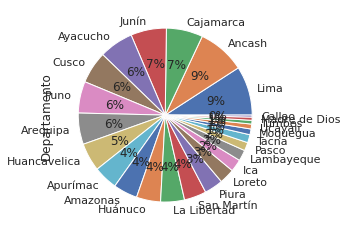

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


df["Departamento"].value_counts().plot.pie(autopct='%.0f%%')

* en la celda anterior apreciamos los distintos departamento del peru

In [46]:
#Filtramos la tabla para el departamento de lima
df=df[df["Departamento"]=="Lima"]
#eliminamos las columnas
df.drop(columns=["Población 2017","Ubigeo","Departamento"],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


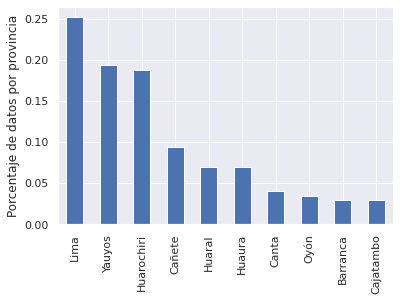

In [48]:
#ahora observamos la distribucion de provincias en el departamento de lima
df.Provincia.value_counts(normalize=True).plot.bar()
plt.ylabel("Porcentaje de datos por provincia")
plt.show()

* Filtramos los resultados para el departamento de lima donde haremos los estudios

In [49]:
df.reset_index(drop=True,inplace=True)

## Coordenadas con la libreria GEOPY de python

* Necesitamos las coordenadas como punto de enlace fuerte



In [8]:
#realizamo algnas modificaciones
df["Distrito"].replace({"Veintisiete de noviembre":"27 de noviembre"},inplace=True)
#obtendremos las coordenadasd de algunos sitios
import geopy
import folium
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="https://www.munlima.gob.pe/")
data_coord={"latitud":[],"longitud":[]}
for district,province in zip(df["Distrito"],df["Provincia"]):
  location=geolocator.geocode("{} , {}".format(province,district))
  print(province,district)
  data_coord["latitud"].append( location.latitude if location else None)
  data_coord["longitud"].append(location.longitude if location else None)
  print(data_coord["latitud"][-1],data_coord["longitud"][-1])
data_coord=pd.DataFrame(data_coord)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Lima Lima
-12.0621065 -77.0365256
Lima Ancón
-11.69655375 -77.11165474769231
Lima Ate
-12.0387281 -76.89687298679642
Lima Barranco
-12.143959 -77.02026805535999
Lima Breña
-12.05970045 -77.05011863865556
Lima Carabayllo
-11.794993049999999 -76.98929232573605
Lima Chaclacayo
-11.9924795 -76.77617635218813
Lima Chorrillos
-12.19234965 -77.00896234092097
Lima Cieneguilla
-12.1124715 -76.8170049
Lima Comas
-11.93286125 -77.04067444714022
Lima El Agustino
-12.04205235 -76.99571439186212
Lima Independencia
-11.989307499999999 -77.04733069719748
Lima Jesús María
-12.0781861 -77.04640320962204
Lima La Molina
-12.0901768 -76.92233779667893
Lima La Victoria
-12.073993699999999 -77.01819656608845
Lima Lince
-12.08656755 -77.03664698683625
Lima Los Olivos
-11.9659853 -77.07307131998294
Lima Lurigancho
-11.948832 -76.76270115208169
Lima Lurín
-12.23804975 -76.7838627203846
Lima Magdalena del Mar
-12.0957149 -77.06824320487323
Lima Pueblo Libre
-12.07663875 -77.06785807599587
Lima Miraflores
-12.121

In [9]:
#verificamos que todas las coordenadas se recuperaron correctamente
data_coord.isnull().any()

latitud     False
longitud    False
dtype: bool

In [10]:
df_merge=pd.concat([df,data_coord],axis=1)

In [11]:
df_merge.shape,df.shape,data_coord.shape

((171, 4), (171, 2), (171, 2))

In [12]:
df_merge.head()

,Provincia,Distrito,latitud,longitud
0,Lima,Lima,-12.062107,-77.036526
1,Lima,Ancón,-11.696554,-77.111655
2,Lima,Ate,-12.038728,-76.896873
3,Lima,Barranco,-12.143959,-77.020268
4,Lima,Breña,-12.059700,-77.050119


* Vamos a visualizar el mapa de Lima

In [13]:
#primero consultamos las coordenadas oficiales de Lima
address="Lima , Perú"
geolocator=Nominatim(user_agent="lima_explorer")
location=geolocator.geocode(address)
print(location.latitude)
latitud=location.latitude
longitud=location.longitude

-12.0621065


In [14]:
import folium

map_lima=folium.Map(location=[latitud,longitud],zoom_start=11)
map_lima


![Mapa folium 1](grafica1.jpg)

## Uso de la API Foursquare

* Con esta obtenemos mejores recomendaciones de las categorias de negocios cercanos al lugar


In [15]:
#agregaremos los puntos de datos en lima

for latitude,longitude,province,district in zip(df_merge["latitud"],df_merge["longitud"],df_merge["Provincia"],df_merge["Distrito"]):
  label="{0}, {1}".format(province,district)
  label=folium.Popup(label,parse_html=True)
  folium.CircleMarker(
      [latitude,longitude],
      popup=label,
      radius=5,
      color="green",
      fill=True
  ).add_to(map_lima)
map_lima

![folium v2](grafica1.jpg)

In [16]:
CLIENT_ID="N3QXWZTKPMSVVDUMPIFCMFPFEVX0LCNQWIZIMO40YQ2AJEXE"
CLIENT_SECRET="I2DACUWQGYR12HVS3PUY5GMTCFNK2QAAIRHEYJJR11QFMBH4"
VERSION = '20180605' # Foursquare API version
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
venues_in_lima=getNearbyVenues(df_merge["Distrito"],df_merge["latitud"],df_merge["longitud"])

Lima
Ancón
Ate
Barranco
Breña
Carabayllo
Chaclacayo
Chorrillos
Cieneguilla
Comas
El Agustino
Independencia
Jesús María
La Molina
La Victoria
Lince
Los Olivos
Lurigancho
Lurín
Magdalena del Mar
Pueblo Libre
Miraflores
Pachacámac
Pucusana
Puente Piedra
Punta Hermosa
Punta Negra
Rimac
San Bartolo
San Borja
San Isidro
San Juan de Lurigancho
San Juan de Miraflores
San Luis
San Martín de Porres
San Miguel
Santa Anita
Santa María del Mar
Santa Rosa
Santiago de Surco
Surquillo
Villa El Salvador
Villa María del Triunfo
Barranca
Paramonga
Pativilca
Supe
Supe puerto
Cajatambo
Copa
Gorgor
Huancapon
Manas
Canta
Arahuay
Huamantanga
Huaros
Lachaqui
San Buenaventura
Santa Rosa de Quives
San Vicente de Cañete
Asia
Calango
Cerro azul
Chilca
Coayllo
Imperial
Lunahuana
Mala
Nuevo imperial
Pacaran
Quilmana
San Antonio
San Luis
Santa Cruz de Flores
Zuñiga
Huaral
Atavillos alto
Atavillos bajo
Aucallama
Chancay
Ihuari
Lampian
Pacaraos
San Miguel de acos
Santa Cruz de Andamarca
Sumbilca
27 de noviembre
Matucan

# 3 Metodología   <a name="methodology"></a>
En este proyecto dirigiremos nuestros esfuerzos a la detección de mejores lugares para emprender un negocio en Lima-Perú.

En el primer paso, hemos recopilado los datos requeridos que fueron:
* Los datos de provincias y distritos
* Las coordenadas de cada distrito
* Las categorias de negocios que se pueden presentar en cadadistrito presente.

El segundo paso en nuestro análisis será el cálculo y la exploración de la de agrupaciones de categorias, agrupaciones de distritos donde implemetaremos una serie de algoritmos para saber cuales son las categoris disponibles.

En el tercer y último paso, nos centraremos en obtener la agrupacion de zonas donde se encuentran las mejores categorias para inciar un negocio


# 4. Analisis  <a name="analysis"></a>

* En esta parte trataremos sobre el analisi preciso de datos desde el agrupamiento de categorias hasta la implementacionde un algoritmo de aprendizaje no supervizado para el agrupamiento.


In [18]:
venues_in_lima.shape

(632, 5)

* Podemos observar que tenemos 632 registros y 5 columnas. A continuacion verificamos los datos

In [19]:
venues_in_lima.head()

,District,District Latitude,District Longitude,Venue,Venue Category
0,Lima,-12.062107,-77.036526,Museo de Arte de Lima - MALI,Art Museum
1,Lima,-12.062107,-77.036526,Anfiteatro del Parque de la Exposición,Concert Hall
2,Lima,-12.062107,-77.036526,Parque de la Exposición,Park
3,Lima,-12.062107,-77.036526,MALI Café,Café
4,Lima,-12.062107,-77.036526,Museo Metropolitano de Lima,Museum


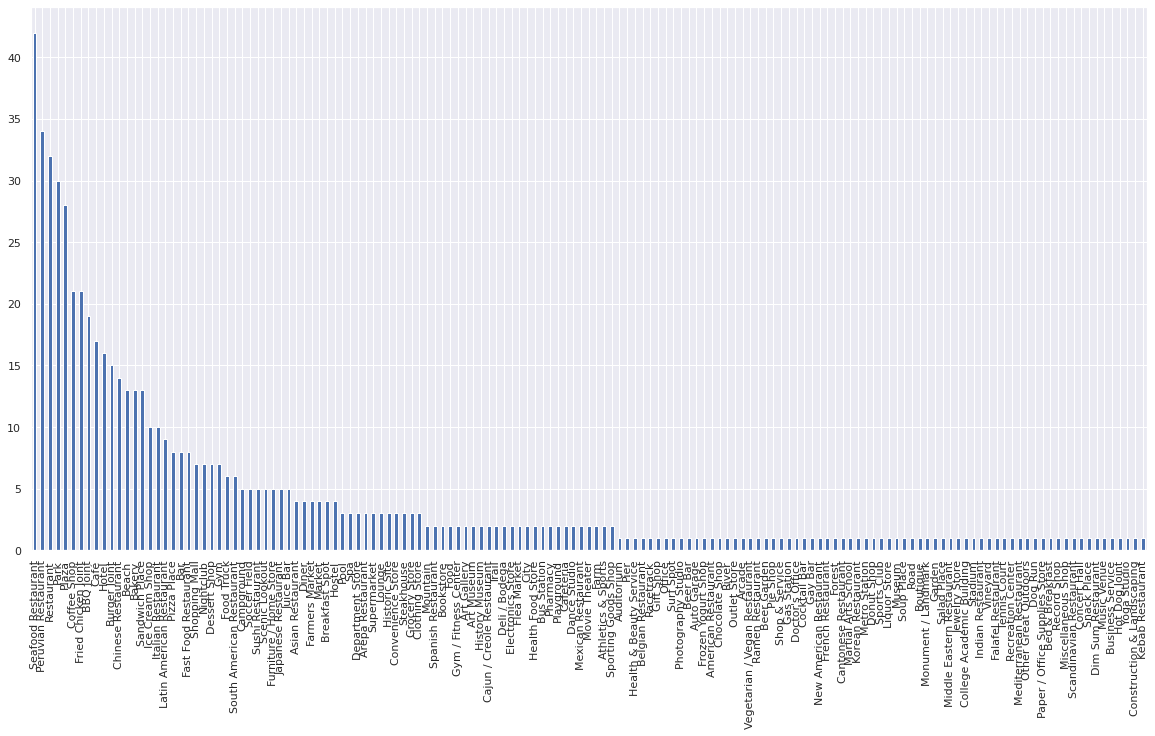

In [56]:
#observaremos la cuantas categoria posee cada distrito
plt.figure(figsize=(20,10))
venues_in_lima["Venue Category"].value_counts().plot.bar()

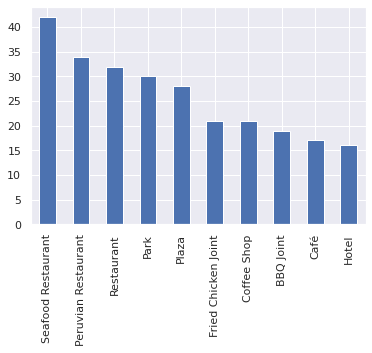

In [60]:
#lo que buscamos es obtener cuales son las 10 categorias mas populares posibles en el mercado
venues_in_lima["Venue Category"].value_counts().sort_values(ascending=False)[:10].plot.bar()

* Mostremos informacion agrupada de los distritos en general

In [61]:
venues_in_lima.groupby("District").head()

,District,District Latitude,District Longitude,Venue,Venue Category
0,Lima,-12.062107,-77.036526,Museo de Arte de Lima - MALI,Art Museum
1,Lima,-12.062107,-77.036526,Anfiteatro del Parque de la Exposición,Concert Hall
2,Lima,-12.062107,-77.036526,Parque de la Exposición,Park
3,Lima,-12.062107,-77.036526,MALI Café,Café
4,Lima,-12.062107,-77.036526,Museo Metropolitano de Lima,Museum
...,...,...,...,...,...
627,Oyón,-10.668416,-76.770244,Plaza de Armas de Oyón,Plaza
628,Azángaro,-12.999961,-75.836901,Antigua Pasteleria Huerfanos,Diner
629,Huancaya,-12.203369,-75.799314,Huancaya,Campground
630,Huancaya,-12.203369,-75.799314,Pepitas de Cacao,Chocolate Shop


* A continuacion comprobamos cuantos registros de lugares existen para cada distrito

In [62]:
venues_in_lima["District"].value_counts()

Huacho                     30
Pueblo Libre               30
San Isidro                 30
Lince                      30
San Borja                  30
                           ..
Santa Rosa de Quives        1
Laraos                      1
Puente Piedra               1
Lurigancho                  1
Villa María del Triunfo     1
Name: District, Length: 77, dtype: int64

* Comprobamos cuantas categorias distitntas existen por lugar

In [22]:
venues_in_lima.groupby(["District"])["Venue Category"].count()

District
Azángaro                    1
Barranca                    9
Barranco                   30
Breña                       9
Cajatambo                   3
                           ..
Surquillo                  30
Vegueta                     1
Villa El Salvador           3
Villa María del Triunfo     1
Zuñiga                      3
Name: Venue Category, Length: 77, dtype: int64

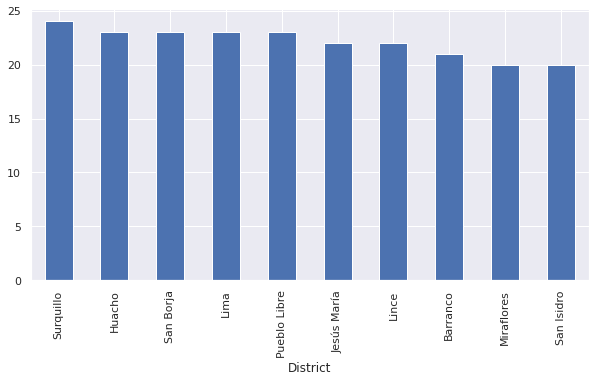

In [79]:
plt.figure(figsize=(10,5))
venues_in_lima.groupby(["District"])["Venue Category"].nunique().sort_values(ascending=False)[:10].plot.bar()

* Cuales son las categorias distintas existen

In [80]:
len(venues_in_lima.groupby(["Venue Category"])["Venue Category"]) # existen unas 145 categoria distintas

145

* Ahora ya se cuantas categorias existen en total por lo cual puedo estimar una codificacion en caliente para expandirlas

In [81]:
lima_venue_categories=pd.get_dummies(venues_in_lima[["District","Venue Category"]],columns=["Venue Category"],prefix="",prefix_sep="")

In [82]:
lima_venue_categories.head()

,District,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bookstore,Boutique,Breakfast Spot,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,City,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Concert Hall,Construction & Landscaping,Convenience Store,Dance Studio,...,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,River,Road,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tennis Court,Trail,Vegetarian / Vegan Restaurant,Vineyard,Yoga Studio
0,Lima,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Ahora agrupamos las categorias

In [83]:
lima_group_cat=lima_venue_categories.groupby("District").mean().reset_index()
lima_group_cat.head()

,District,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bookstore,Boutique,Breakfast Spot,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,City,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Concert Hall,Construction & Landscaping,Convenience Store,Dance Studio,...,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,River,Road,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Tennis Court,Trail,Vegetarian / Vegan Restaurant,Vineyard,Yoga Studio
0,Azángaro,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barranca,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Barranco,0.0,0.0,0.0,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.133333,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.033333,0.066667,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.066667,0.0,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Breña,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cajatambo,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Ahora optendremos las categorias de lugares mas comunes

In [84]:
import numpy as np
def return_most_common_venues(row,num_top_venues):
  row_categories=row.iloc[1:]
  row_categories_sorted=row_categories.sort_values(ascending=False)

  return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = lima_group_cat['District']

for ind in np.arange(lima_group_cat.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lima_group_cat.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azángaro,Diner,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Donut Shop,Doctor's Office
1,Barranca,Coffee Shop,Convenience Store,Asian Restaurant,Chinese Restaurant,Racetrack,Bus Station,Hotel,Park,Department Store,Deli / Bodega
2,Barranco,Bar,Seafood Restaurant,Sandwich Place,Burger Joint,Nightclub,Art Gallery,Health Food Store,French Restaurant,Café,Lounge
3,Breña,Fast Food Restaurant,Restaurant,South American Restaurant,Shopping Mall,Fried Chicken Joint,Peruvian Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
4,Cajatambo,Hostel,Peruvian Restaurant,Doctor's Office,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Donut Shop,Dog Run,Diner


* Ahora procedemos a agrupar los clusters mas cercanos para encontrar similiritudes

In [86]:
from sklearn.cluster import KMeans

#implementamos el numero de grupos a encontrar
k_num_clusters=5
lima_grouped_clustering=lima_group_cat.drop("District",axis=1)
kmeans=KMeans(n_clusters=k_num_clusters,random_state=0).fit(lima_grouped_clustering)

In [87]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 2, 4, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

* Agregamos las etiquetas a las 10 categorias mas comunes

In [88]:
district_venues_sorted.insert(0,"Etiquetas de Grupos",kmeans.labels_)

* Mezclar los origenes de datos de **lima_group_cat** y **df_merge**

In [89]:
lima_merged=df_merge
lima_merged=lima_merged.join(district_venues_sorted.set_index("District"),on="Distrito")

In [90]:
lima_merged.head()

,Provincia,Distrito,latitud,longitud,Etiquetas de Grupos,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lima,Lima,-12.062107,-77.036526,0.0,Pizza Place,Park,Café,Plaza,Peruvian Restaurant,Seafood Restaurant,Art Museum,Museum,Dance Studio,Shopping Mall
1,Lima,Ancón,-11.696554,-77.111655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lima,Ate,-12.038728,-76.896873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lima,Barranco,-12.143959,-77.020268,0.0,Bar,Seafood Restaurant,Sandwich Place,Burger Joint,Nightclub,Art Gallery,Health Food Store,French Restaurant,Café,Lounge
4,Lima,Breña,-12.059700,-77.050119,0.0,Fast Food Restaurant,Restaurant,South American Restaurant,Shopping Mall,Fried Chicken Joint,Peruvian Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


* Removemos todos los nulos

In [91]:
lima_merged_clean=lima_merged.dropna(subset=["Etiquetas de Grupos"])

In [95]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters=folium.Map(location=[latitude,longitude],zoom_start=9)

#asignar colo al esquena de los clusyeres
x=np.arange(k_num_clusters)

ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lima_merged_clean['latitud'], lima_merged_clean['longitud'], lima_merged_clean['Distrito'], lima_merged_clean['Etiquetas de Grupos']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters)
        
map_clusters

![foliumv3](grafica3.png)

# RESULTADOS Y DISCUSION <a name="results"></a>

* El analisis de los datos nos dice que la mayoria de categorias populares, especificamente 10, se encuentran en la provincia de lima.

* Debido a la popularidad de los servicios, se encontraron los 5 mejores grupos que  actuan de manera distinta frente a los productos

* El grupo mas popular de personas o entidades que consumen, se encuentra en los distritos de barranco, ate, Miraflores.

* Se encontraron mas 100 categorias distintas de negocio en el departamento de Lima

* Las categorias de consumo mas destacadas por los usuarios fueron **comida rapida, adquirir una pizza, Compras en el Mall (Shopping Mall), y Cine**



# CONCLUSIONES <a name="conclusion"></a>


Ante dicho analisis de datos mas mejores desiciones que puede tomar nuestro cliente para iniciar un negocio en la provincia Lima seria:

* Su segmentacion de mercado donde deberia empezar corresponde a las zonas: Lima, Miraflores, Ate, Barranco

* El rubro donde deberia desenvolverse seria: Cine, Comida rapida, Inversionista enel Mall. Por deberse a las mas acertadas y requeridas por los usuarios.
 

#### Gracias!